Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion

In [23]:
# load env
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["PINECODE_API_KEY"]=os.getenv("PINECODE_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["HUGGINGFACE_API_KEY"]=os.getenv("HUGGINGFACE_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]=os.getenv("LANGCHAIN_TRACING_V2")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [24]:
# load llm model
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o", temperature=0)

In [25]:
#search attraction and activity
#1. search attraction
#2. search restaurant
#3. search activity
#4. search transportation
from langchain_core.tools import tool

@tool
def search_attraction_activity(location:str) ->str:
    """
    search_attraction_activity
    """
    pass

In [26]:
#search weather forecast
#1. get current weather
#2. get weather forecast
from langchain_core.tools import tool

@tool
def search_weather_forecast(location:str) ->str:
    """
    search_weather_forecast
    """
    pass

In [27]:
#search hotel costs
#1. search hotel
#2. estimate the hotel cost
#3. budget_range
from langchain_core.tools import tool

@tool
def search_hotel_cost(location:str) ->str:
    """
    search_hotel_cost
    """
    pass

In [28]:
#currency_conversion
#1. get exchange rate
#2. convert currency
from langchain_core.tools import tool

@tool
def currency_conversion(location:str) ->str:
    """
    currency_conversion
    """
    pass

In [29]:
# define calculator tools
from langchain_core.tools import tool

@tool
def add(a : int, b : int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The addition of a and b.
    """
    return a+b

@tool
def subtract(a : int, b : int) -> int:
    """
    Subtract two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The subtraction of a and b.
    """
    return a-b

@tool
def multiply(a : int, b : int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a*b

@tool
def divide(a : int, b : int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The division of a and b.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a/b

In [32]:
tools=[add,subtract,multiply,divide,search_attraction_activity,currency_conversion,search_hotel_cost,search_weather_forecast]

In [33]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

tool_node=ToolNode(tools)
def supervisor(state:MessagesState):
    last_message=state["messages"]
    print(f"##supervisor## {last_message}")
    system_prompt="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."
    user_query=[system_prompt]+last_message
    response=llm_with_tools.invoke(user_query)
    return {"messages":[response]}

In [34]:
graph=StateGraph(MessagesState)

graph.add_node("supervisor",supervisor)

graph.add_node("tools",tool_node)

graph.set_entry_point("supervisor")

graph.add_conditional_edges("supervisor",tools_condition)

graph.add_edge("tools","supervisor")

work_flow=graph.compile()

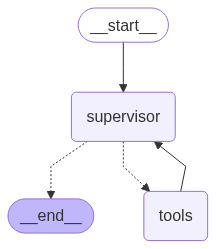

In [35]:
from IPython.display import Image, display
display(Image(work_flow.get_graph().draw_mermaid_png()))